In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uploadingagain/test-jpg/test-jpg/test_18979.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_24790.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_30624.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_7922.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_33905.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_15492.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_37288.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_7804.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_31214.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_15276.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_9587.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_31230.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_30851.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_36146.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_16808.jpg
/kaggle/input/uploadingagain/test-jpg/test-jpg/test_31418.jpg
/kaggle/inp

In [ ]:
import tensorflow_io as tfio
print(tfio.__version__)

0.31.0


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = '/kaggle/input/planet-understanding-the-amazon-from-space/train_v2.csv/train_v2.csv'
test_path = '/kaggle/input/planet-understanding-the-amazon-from-space/sample_submission_v2.csv/sample_submission_v2.csv'
train_images = '/kaggle/input/uploadingagain/train-jpg/train-jpg'
test_images = '/kaggle/input/missedfiles/test-jpg'

In [ ]:
train_df = pd.read_csv(train_path)
print(train_df.shape)
train_df.head()

(40479, 2)


image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

In [ ]:
test_df = pd.read_csv(test_path)
print(test_df.shape)
test_df.head()

(61191, 2)


image_name                                  tags
0     test_0  primary clear agriculture road water
1     test_1  primary clear agriculture road water
2     test_2  primary clear agriculture road water
3     test_3  primary clear agriculture road water
4     test_4  primary clear agriculture road water

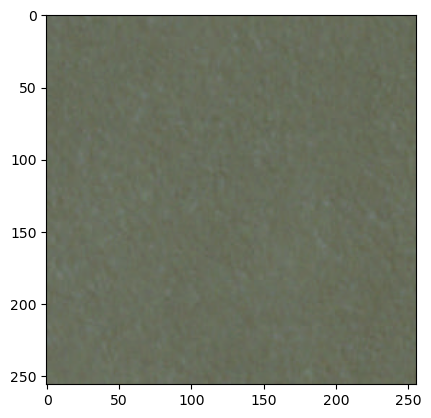

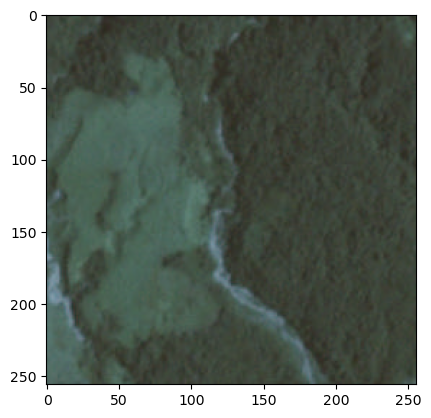

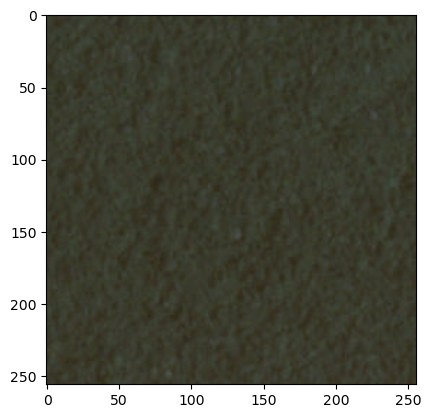

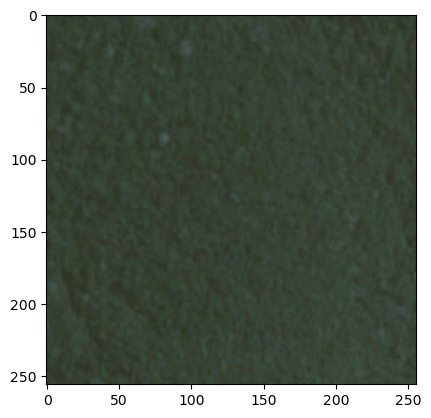

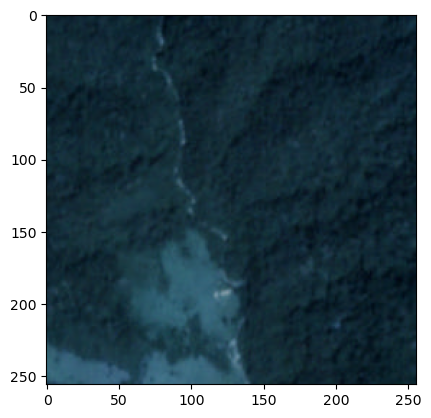

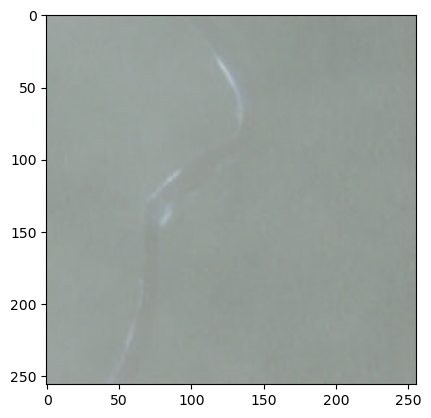

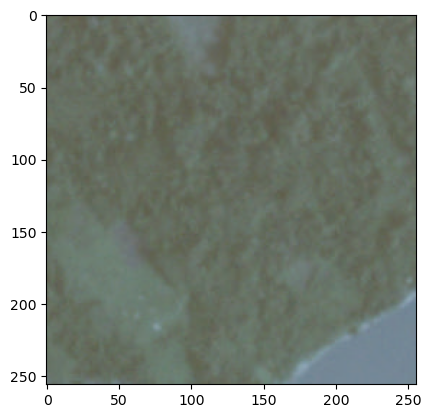

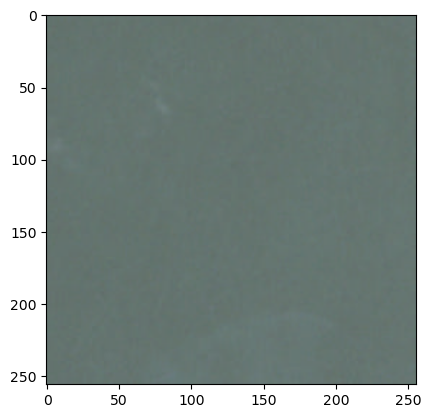

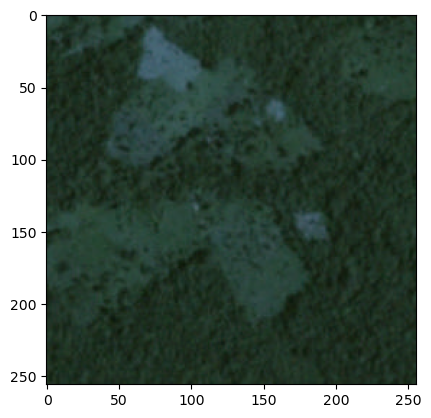

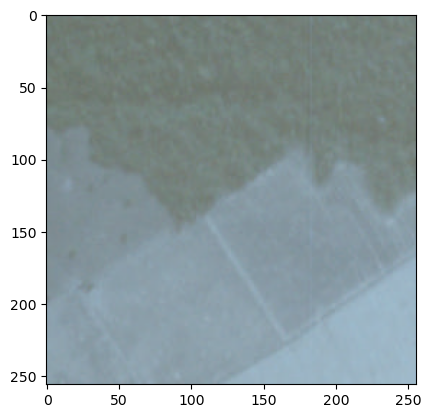

In [ ]:
folder = train_images  # Replace with the correct folder path
for i in range(10):
    filename = folder + '/' + 'train_' + str(i) + '.jpg'
    image = cv2.imread(filename)

    if image is None:
        print(f"Failed to load image: {filename}")
        continue

    # Check image data type
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)

    plt.imshow(image)
    plt.show()

In [ ]:
print(f'Number of images: {train_df.shape[0]}')

Number of images: 40479


In [ ]:
train_df['tags'].nunique()

449

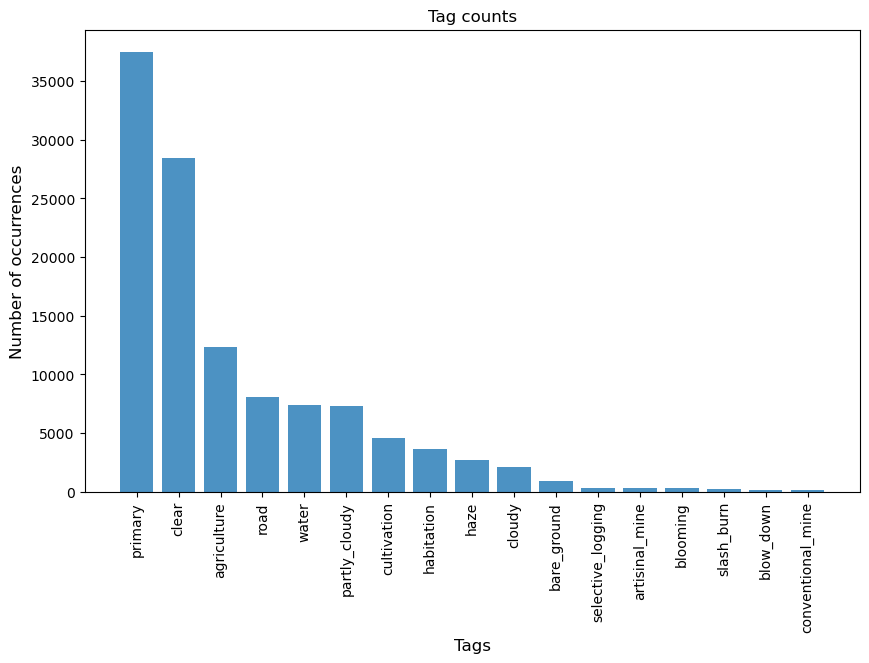

In [ ]:
tags = train_df['tags'].apply(lambda x: x.split(' '))
tags = [item for sublist in tags for item in sublist]
tag_counts = pd.Series(tags).value_counts()

plt.figure(figsize=(10,6))
plt.bar(tag_counts.index, tag_counts.values, alpha=0.8)
plt.title('Tag counts')
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Tags', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [ ]:
labels = set()
def splitting_tags(tags):
    [labels.add(tag) for tag in tags.split()]

train_df1 = train_df.copy()
train_df1['tags'].apply(splitting_tags)
labels = list(labels)
print(labels)

['water', 'primary', 'slash_burn', 'conventional_mine', 'artisinal_mine', 'haze', 'bare_ground', 'road', 'habitation', 'cloudy', 'selective_logging', 'cultivation', 'blooming', 'clear', 'agriculture', 'blow_down', 'partly_cloudy']


In [ ]:
for tag in labels:
    train_df1[tag] = train_df1['tags'].apply(lambda x: 1 if tag in x.split() else 0)

train_df1['image_name'] = train_df1['image_name'].apply(lambda x: '{}.jpg'.format(x))
train_df1.head()

image_name                                       tags  water  primary  \
0  train_0.jpg                               haze primary      0        1   
1  train_1.jpg            agriculture clear primary water      1        1   
2  train_2.jpg                              clear primary      0        1   
3  train_3.jpg                              clear primary      0        1   
4  train_4.jpg  agriculture clear habitation primary road      0        1   

   slash_burn  conventional_mine  artisinal_mine  haze  bare_ground  road  \
0           0                  0               0     1            0     0   
1           0                  0               0     0            0     0   
2           0                  0               0     0            0     0   
3           0                  0               0     0            0     0   
4           0                  0               0     0            0     1   

   habitation  cloudy  selective_logging  cultivation  blooming  clear  \
0           0       0                  0            0         0      0   
1           0       0                  0            0         0      1   
2           0       0                  0            0         0      1   
3           0       0                  0            0         0      1   
4           1       0                  0            0         0      1   

   agriculture  blow_down  partly_cloudy  
0            0          0              0  
1            1          0              0  
2            0          0              0  
3            0          0              0  
4            1          0              0

In [ ]:
columns = list(train_df1.columns[2:])
train_datagen = ImageDataGenerator(rescale = 1./255., validation_split = 0.2)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df1,
                                                    directory =train_images,
                                                    x_col='image_name', y_col=columns, subset='training',
                                                    batch_size=32,seed=42, shuffle=True,
                                                    class_mode='raw', target_size=(128,128))

val_generator = train_datagen.flow_from_dataframe(dataframe=train_df1,
                                                  directory =train_images,
                                                  x_col='image_name', y_col=columns, subset='validation',
                                                  batch_size=32,seed=42, shuffle=True,
                                                  class_mode='raw', target_size=(128,128))

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [ ]:
step_train_size = int(np.ceil(train_generator.samples / train_generator.batch_size))
step_val_size = int(np.ceil(val_generator.samples / val_generator.batch_size))

In [ ]:
def cnn_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=17, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
model = cnn_model()

In [ ]:
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = Adam(lr=0.001)

loss_values = []

In [ ]:
history = model.fit(x=train_generator,
                    steps_per_epoch=step_train_size,
                    validation_data=val_generator,
                    validation_steps=step_val_size,
                    epochs=20,
                    callbacks=[tf.keras.callbacks.LambdaCallback(
                        on_epoch_end=lambda epoch, logs: loss_values.append(logs['loss']))
                    ])

Epoch 1/20
1012/1012 [==============================] - 179s 164ms/step - loss: 0.2360 - accuracy: 0.7275 - val_loss: 0.1964 - val_accuracy: 0.7418
Epoch 2/20
1012/1012 [==============================] - 90s 89ms/step - loss: 0.1822 - accuracy: 0.7317 - val_loss: 0.1603 - val_accuracy: 0.7757
Epoch 3/20
1012/1012 [==============================] - 89s 88ms/step - loss: 0.1674 - accuracy: 0.7110 - val_loss: 0.1516 - val_accuracy: 0.7565
Epoch 4/20
1012/1012 [==============================] - 91s 90ms/step - loss: 0.1611 - accuracy: 0.6784 - val_loss: 0.1511 - val_accuracy: 0.7595
Epoch 5/20
1012/1012 [==============================] - 89s 88ms/step - loss: 0.1527 - accuracy: 0.6547 - val_loss: 0.1380 - val_accuracy: 0.6548
Epoch 6/20
1012/1012 [==============================] - 90s 89ms/step - loss: 0.1488 - accuracy: 0.6598 - val_loss: 0.1689 - val_accuracy: 0.7455
Epoch 7/20
1012/1012 [==============================] - 89s 88ms/step - loss: 0.1444 - accuracy: 0.6494 - val_loss: 0.1459

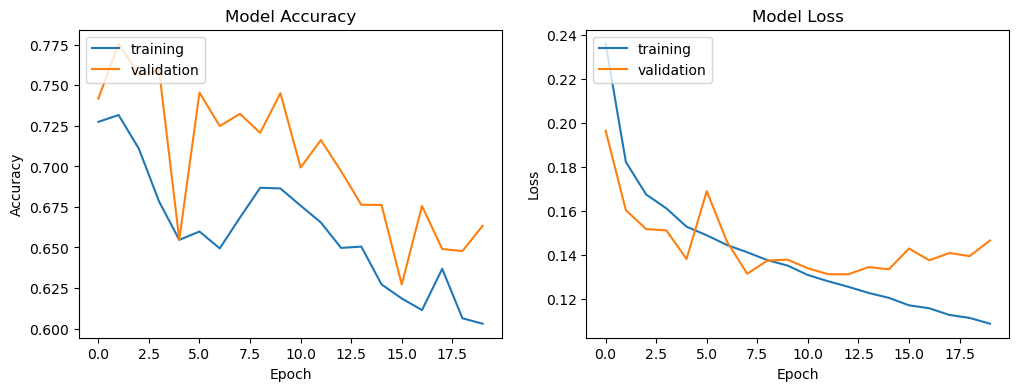

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')

plt.show()

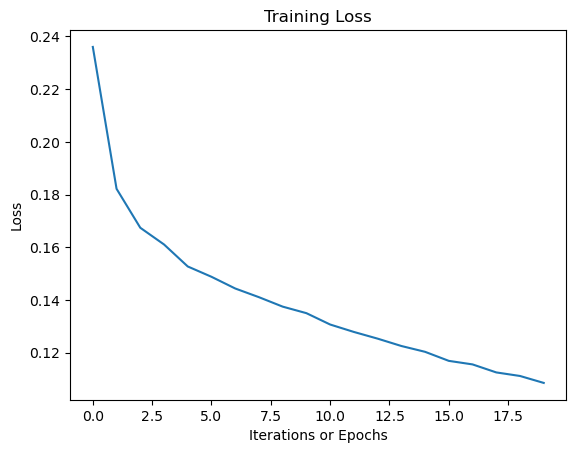

In [ ]:
df_loss = pd.DataFrame({'loss': loss_values})

# Plot the loss function
plt.plot(df_loss.index, df_loss['loss'])
plt.xlabel('Iterations or Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [ ]:
sample_submission = pd.read_csv('/kaggle/input/planet-understanding-the-amazon-from-space/sample_submission_v2.csv/sample_submission_v2.csv')
sample_submission1 = sample_submission.copy()
sample_submission1['image_name'] = sample_submission1['image_name'].apply(lambda x: '{}.jpg'.format(x))
sample_submission1.head()

image_name                                  tags
0  test_0.jpg  primary clear agriculture road water
1  test_1.jpg  primary clear agriculture road water
2  test_2.jpg  primary clear agriculture road water
3  test_3.jpg  primary clear agriculture road water
4  test_4.jpg  primary clear agriculture road water

In [ ]:
test_df1 = sample_submission1.iloc[:40669]['image_name'].reset_index().drop('index', axis =1)
test_df1.head()

image_name
0  test_0.jpg
1  test_1.jpg
2  test_2.jpg
3  test_3.jpg
4  test_4.jpg

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_gen = test_datagen.flow_from_dataframe(dataframe=test_df1,
                                            directory='/kaggle/input/missedfiles/test-jpg',
                                            x_col="image_name",
                                            y_col=None,
                                            batch_size=32,
                                            seed=42,
                                            shuffle=False,
                                            class_mode=None,
                                            target_size=(128,128))

step_test_size1 = int(np.ceil(test_gen.samples/test_gen.batch_size))

Found 40669 validated image filenames.


In [ ]:
test_gen.reset()
pred = model1.predict(test_gen, steps=step_test_size1, verbose=1)

1271/1271 [==============================] - 165s 130ms/step


In [ ]:
file_names = test_gen.filenames

pred_tags = pd.DataFrame(pred)
pred_tags = pred_tags.apply(lambda x: ' '.join(np.array(labels)[x > 0.5]), axis = 1)

result1 = pd.DataFrame({'image_name': file_names, 'tags': pred_tags})
result1.head()

image_name                                               tags
0  test_0.jpg  water slash_burn conventional_mine haze bare_g...
1  test_1.jpg  water conventional_mine haze bare_ground road ...
2  test_2.jpg  water slash_burn conventional_mine haze bare_g...
3  test_3.jpg  water conventional_mine haze bare_ground road ...
4  test_4.jpg  water slash_burn conventional_mine haze bare_g...

In [ ]:
result1.to_csv('predictionss.csv', index = False)